<a href="https://colab.research.google.com/github/anishchapagain/Deep-Learning/blob/main/torch_linear_reg_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data to tensor
## Linear Regression

In [ ]:
import torch

### Known parameter

In [ ]:
weight = 0.7
bias = 0.3

In [ ]:
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias # + torch.randn(X.shape[0], 1)

In [ ]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

Split into Train and Test: create train/test

In [ ]:
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
X_train[:10], y_train[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=2, label="Predictions")

  plt.legend(prop={"size":14})

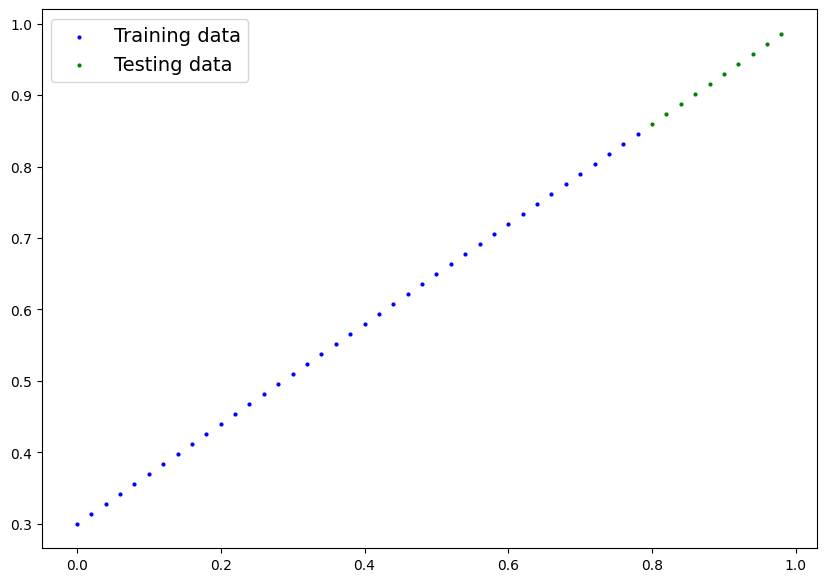

In [ ]:
plot_predictions()

# PyTorch Model

In [ ]:
class LinearRegressionModel(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = torch.nn.Parameter(
        torch.randn(
            1,
            requires_grad=True,
            dtype=torch.float)
    )
    self.bias = torch.nn.Parameter(
        torch.randn(
            1,
            requires_grad=True,
            dtype=torch.float)
    )

  # Forward: computation in the model, should be present (nn.Module)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias


### Model does

1.   Start with random values
2.   Look at training data and adjust the random values to get closer to ideal values (weight & bias)

Using: Gradient Descent, Backpropagation


In [ ]:
torch.randn(
            1,
            requires_grad=True,
            dtype=torch.float)

tensor([0.6137], requires_grad=True)

In [ ]:
# Random Seed
torch.manual_seed(42)

# Create instance of model
model_0 = LinearRegressionModel()

# Check parameters
model_0.state_dict(), model_0.weight, model_0.bias

(OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))]),
 Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True))

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [ ]:
### Making Prediction
with torch.inference_mode(): # code faster & preffered or torch.no_grad()
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

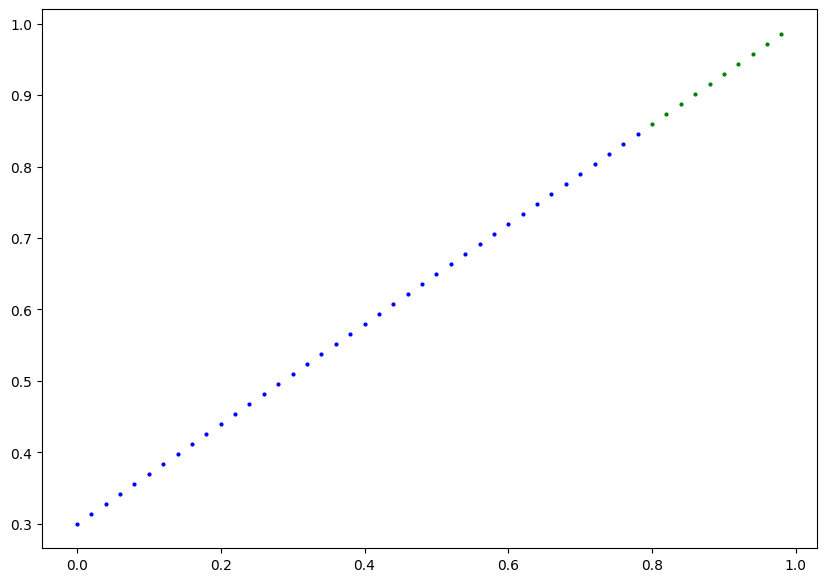

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
# Train Model

# Measure model prediction by using Loss function or cost function
# Loss function: how wrong model prodictions have been. More lower is the better.
# Optimizer: Adjust model parameter, watching the loss function.

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Loss Function
loss_fn = torch.nn.L1Loss() # Mean Absolute Error

# Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01) # learning rate

In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
print(model_0.state_dict())

# Training Loop
training_loops = 200

# Track Model
training_count = []
loss_values = []
test_loss_values = []

# Train model
for training_loop in range(training_loops):

  model_0.train()  # Train model

  y_pred = model_0(X_train) # forward pass

  loss = loss_fn(y_pred, y_train) # loss calculation

  optimizer.zero_grad() # optimizer

  loss.backward() # back propagation on loss

  optimizer.step() # optimizer -> SGD

  # Testing

  model_0.eval() # Evaluation mode
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if training_loop % 10 == 0:
    training_count.append(training_loop)
    loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())

    print(f"Epoch: {training_loop} | Loss: {loss} | Test loss: {test_loss}")
    # print(model_0.state_dict()) # Print model state_dict


OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])
Epoch: 0 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 10 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 20 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 30 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 40 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 50 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 60 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 70 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 80 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 90 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 100 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 110 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 120 | Loss: 0.008932482451200485 | Test loss

Text(0.5, 0, 'Training Count')

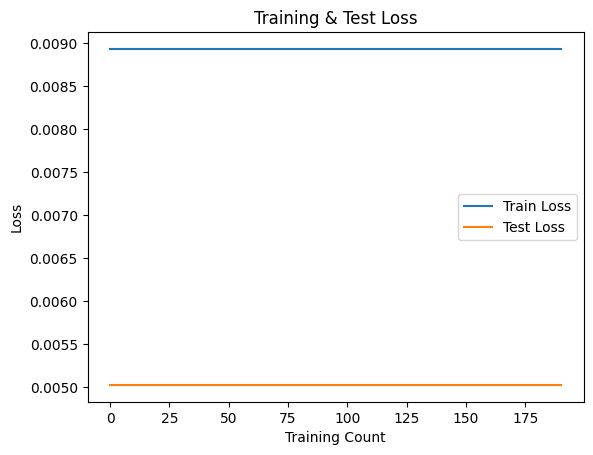

In [ ]:
# Plot the loss curve

plt.plot(training_count, loss_values, label="Train Loss")
plt.plot(training_count, test_loss_values, label="Test Loss")
plt.legend()
plt.title("Training & Test Loss")
plt.ylabel("Loss")
plt.xlabel("Training Count")

### Forward -> Calcuate Loss -> Optim zero grad -> loss backward -> optimize -> no grad -> forward pass -> calculate loss ->

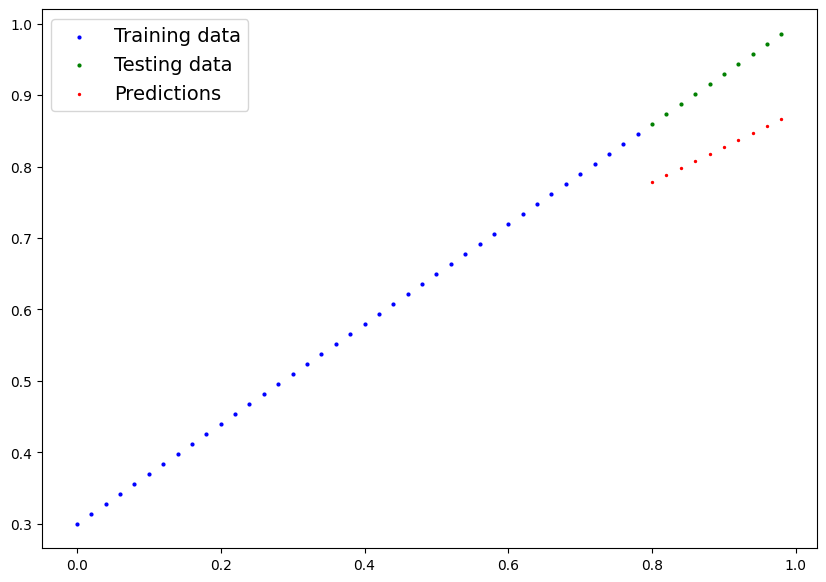

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds_new)

In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.4920])), ('bias', tensor([0.3848]))])

In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:
model_0.weight, model_0.bias

(Parameter containing:
 tensor([0.6990], requires_grad=True),
 Parameter containing:
 tensor([0.3093], requires_grad=True))

## Saving and Loading

In [ ]:
# torch.save()
# torch.load()
# torch.nn.Module.load_state_dict